In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [4]:
data=pd.read_csv('mushrooms.csv')

In [5]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


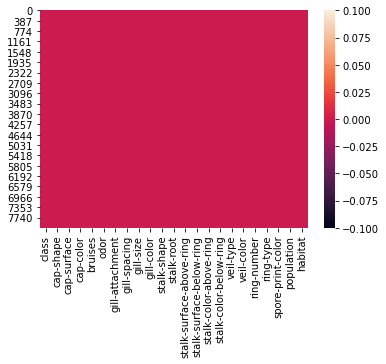

In [6]:
sns.heatmap(data.isnull())

In [7]:
a=data.groupby(['class','cap-shape']).size()
a

class  cap-shape
e      b             404
       f            1596
       k             228
       s              32
       x            1948
p      b              48
       c               4
       f            1556
       k             600
       x            1708
dtype: int64

In [113]:
a=data.copy()

In [114]:
from collections import defaultdict
d=defaultdict(LabelEncoder)
fit=a.apply(lambda x: d[x.name].fit_transform(x))

In [120]:
X=fit.iloc[:,1:]
y=fit.iloc[:,0]

In [124]:
onehotencoder=OneHotEncoder(sparse=False)

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [126]:
X_train=onehotencoder.fit_transform(X_train)
X_test=onehotencoder.transform(X_test)

In [133]:
model=Sequential()
model.add(Dense(input_dim=117,activation='sigmoid',units=128))
model.add(Dropout(0.2))
model.add(Dense(activation='sigmoid',units=64))
model.add(Dense(activation='sigmoid',units=1))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [138]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),
         epochs=20,batch_size=25)

Train on 6499 samples, validate on 1625 samples
Epoch 1/20
6499/6499 [==============================] - 0s 44us/step - loss: 2.4331e-06 - accuracy: 1.0000 - val_loss: 8.5025e-07 - val_accuracy: 1.0000
Epoch 2/20
6499/6499 [==============================] - 0s 41us/step - loss: 2.5888e-06 - accuracy: 1.0000 - val_loss: 7.3633e-07 - val_accuracy: 1.0000
Epoch 3/20
6499/6499 [==============================] - 0s 43us/step - loss: 1.7415e-05 - accuracy: 1.0000 - val_loss: 7.8486e-07 - val_accuracy: 1.0000
Epoch 4/20
6499/6499 [==============================] - 0s 44us/step - loss: 2.4480e-06 - accuracy: 1.0000 - val_loss: 5.9700e-07 - val_accuracy: 1.0000
Epoch 5/20
6499/6499 [==============================] - 0s 43us/step - loss: 7.5476e-06 - accuracy: 1.0000 - val_loss: 7.4338e-07 - val_accuracy: 1.0000
Epoch 6/20
6499/6499 [==============================] - 0s 43us/step - loss: 2.6374e-06 - accuracy: 1.0000 - val_loss: 3.3560e-07 - val_accuracy: 1.0000
Epoch 7/20
6499/6499 [============

In [ ]:
predict_vars=